In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.io import loadmat, savemat
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

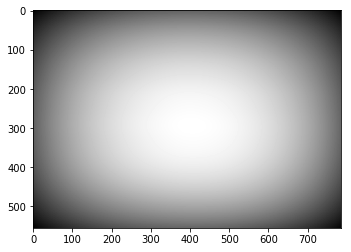

In [3]:
gdict = loadmat('/Users/grego/Downloads/midterm_blur.mat')
A = gdict['A']
B = gdict['B']
G = gdict['G']
plt.imshow(G,cmap='gray')

In [5]:
A.shape,B.shape,G.shape

((785, 785), (555, 555), (555, 785))

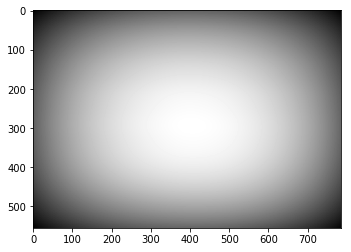

In [11]:
plt.imshow(G,cmap='gray')

In [12]:
ub,sb,vbt = np.linalg.svd(B)
ua,sa,vat = np.linalg.svd(A)

In [13]:
Ghat = ub.T.dot(G).dot(ua)

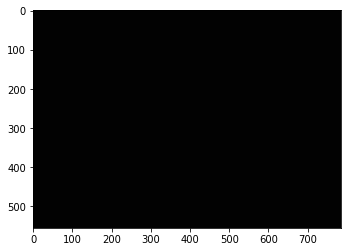

In [14]:
plt.imshow(Ghat,cmap='gray')

In [15]:
S = np.outer(sb,sa)

In [16]:
Fhat = Ghat / S

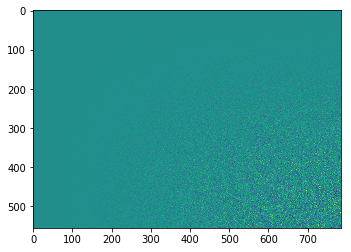

In [17]:
plt.imshow(Fhat)

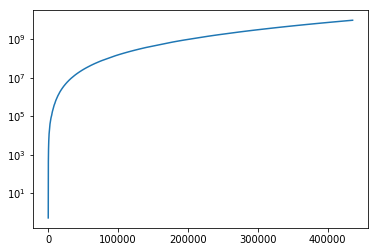

In [18]:
plt.semilogy(np.sort((1/S).flatten()))

In [19]:
np.where(S>0.5)

(array([0, 0, 1], dtype=int64), array([0, 1, 0], dtype=int64))

In [20]:
def TSVD1(S,alpha):
    idx = np.where(S>alpha)
    Sinv = np.zeros(S.shape)
    Sinv[idx] = 1/S[idx]
    return Sinv

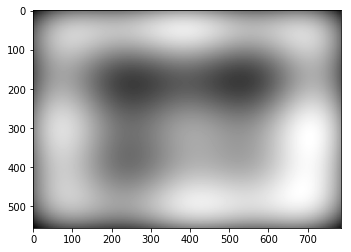

In [21]:
alpha = 0.1
Sinv = TSVD1(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

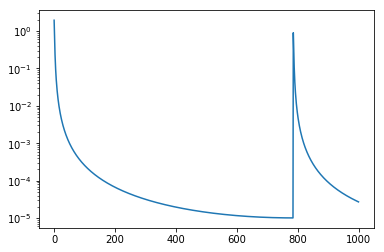

In [22]:
plt.semilogy(S.flatten()[:1000])

In [23]:
perm = np.argsort(S.flatten())

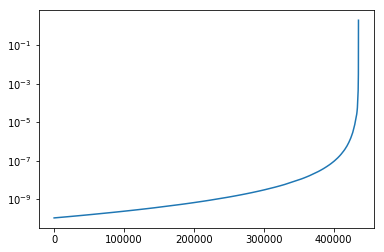

In [24]:
plt.semilogy(S.flatten()[perm])

In [25]:
iperm = np.empty(perm.size,dtype=perm.dtype)
iperm[perm] = np.arange(perm.size)

In [26]:
def TSVD2(S,k):
    perm = np.argsort(S.flatten())
    iperm = np.empty(perm.size,dtype=perm.dtype)
    iperm[perm] = np.arange(perm.size)
    Sinv = np.zeros(S.size)
    Sinv[-k:] = 1/(S.flatten()[perm[-k:]])
    Sinv = Sinv[iperm]
    return Sinv.reshape(S.shape)

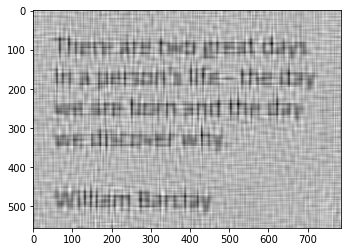

In [49]:
k = 10000
Sinv = TSVD2(S,k)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

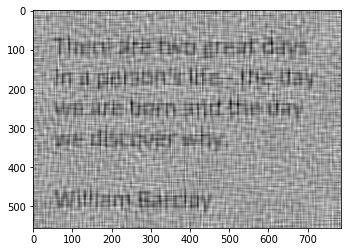

In [67]:
alpha = 0.000001
Sinv = TSVD1(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

In [68]:
def TIKHONOV(S,alpha):
    return S /(S*S+alpha*alpha)

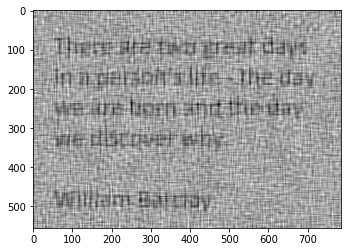

In [74]:
alpha = 0.000001
Sinv = TIKHONOV(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

In [75]:
# 03.20 is best example to consult to do this project